# Importing the libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix

# Loading the dataset

In [119]:
data = datasets.load_iris()

# Creating a pandas dataframe

In [120]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["target"] = data["target"]

In [121]:
# mapping the target vale with target names for personal use
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2 : "virginica"})

In [122]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
89,5.5,2.5,4.0,1.3,1,versicolor
36,5.5,3.5,1.3,0.2,0,setosa
115,6.4,3.2,5.3,2.3,2,virginica
121,5.6,2.8,4.9,2.0,2,virginica
120,6.9,3.2,5.7,2.3,2,virginica


In [123]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Clearly no data is missing and data doesnot seems to require any scalling 

# Exploratary Data Analysis

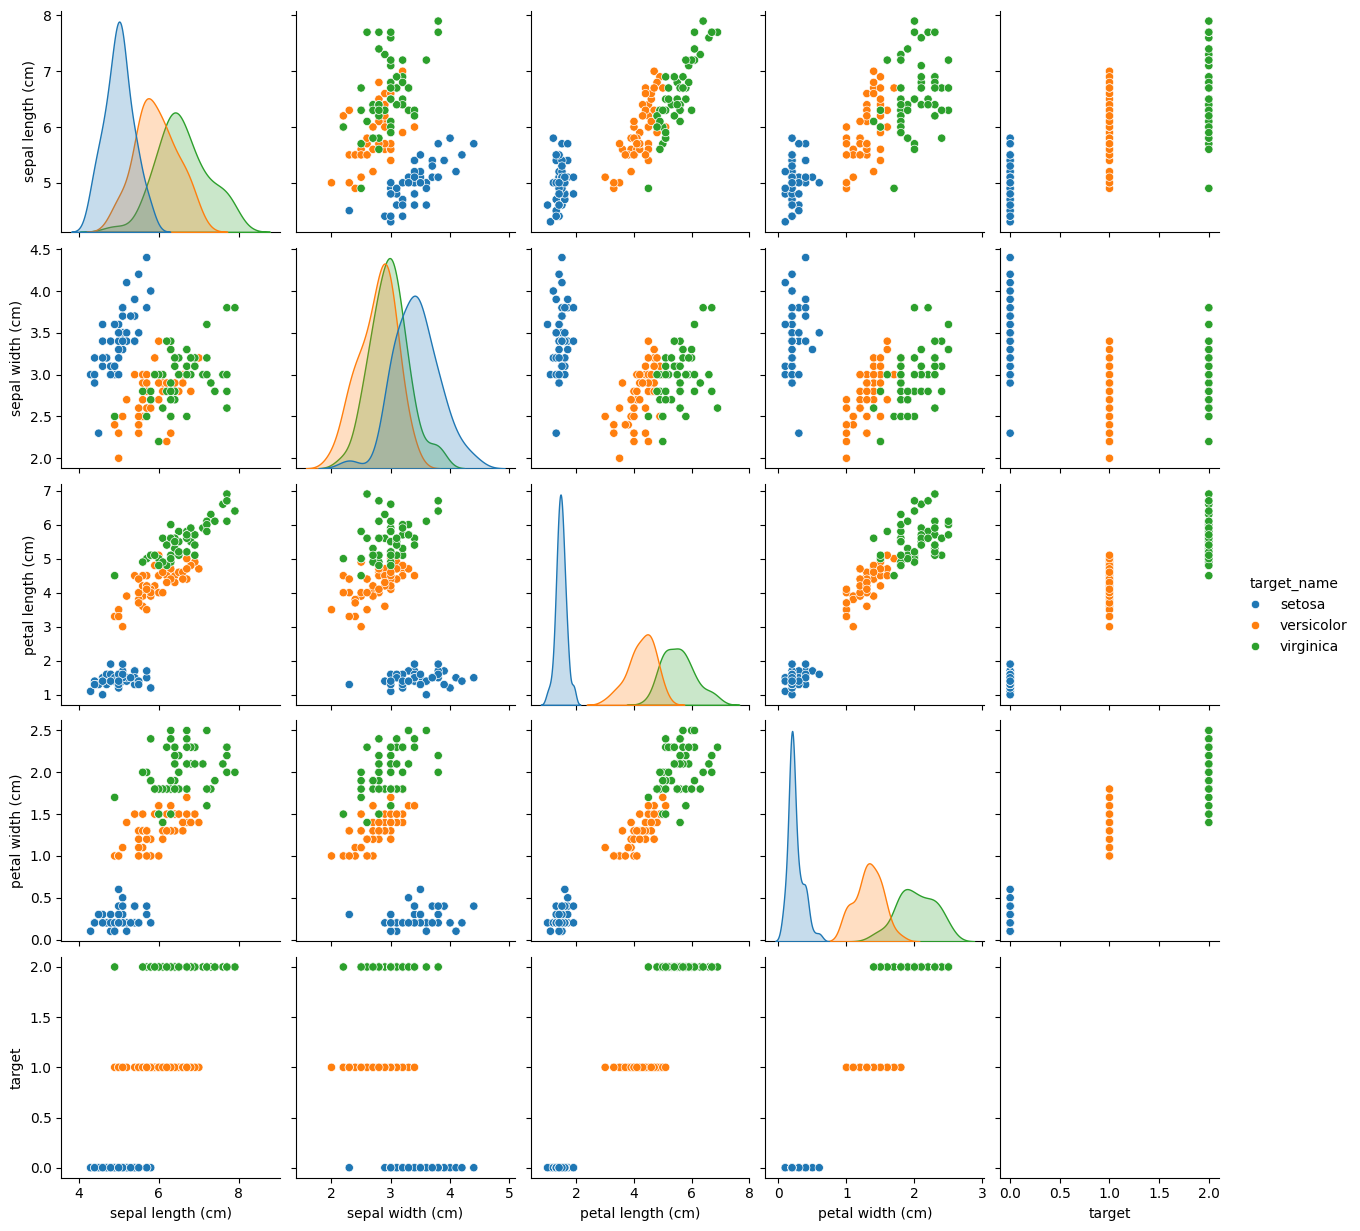

In [124]:
sns.pairplot(df, hue = "target_name")

# Initial thoughts

## what we know
from the data anlysis, we see that setosa is fairely classificable from the versicolor and virginica based on the petal length and petal width itself. But the classification of the versicolor and virginica is bit difficult as some of their feature overlap in all four of the cases.

## what is the baseline 
the baseline model, the simplest model required is beat atleast 33% accuracy as the probability of the guessing without any intelligence or based on pure guess is 33%. Moreover the simplest model that we can make is the simple decision based ie if else using the petal length which will surely predict for setosa but for other two flower the relation plot of the target with other feature are clearly overlapping fot the versicolor anf virginca. for the model a logistic regression based model is trained


# Train test Split

In [125]:
# splitting the dataset into two dataframes one for training and one for testing
df_train , df_test = train_test_split(df, test_size = 0.2, random_state=42)

In [126]:
# splitting the training dataframe to inputs and outputs and also converting into numpy array 
x_train = np.array(df_train.drop(columns = ["target", "target_name"]))
y_train = np.array(df_train["target"])

In [127]:
# splitting the testing dataframe to inputs and outputs and also converting into numpy array 
x_test = np.array(df_test.drop(columns = ["target", "target_name"]))
y_test = np.array(df_test["target"])

The train test split could have been done without sepparating the dataframe also but seperating the dataframe could assit for feature name as dataframe is converted to numpy array and we can add the prediction into the dataframe later for visualization.

# Model training

In [128]:
# Decision Tree model is used for the training

In [129]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [130]:
y_cross_pred_accuracy = cross_val_score(model, x_train, y_train, scoring="accuracy")

In [131]:
accuracy = np.mean(y_cross_pred_accuracy)
print(f"Accuracy : {accuracy * 100:.2f}%")

Accuracy : 94.17%


The model is trained on the training data and by cross validation the accuracy is 97.33%. Now checking for the point of wrong prediction

In [132]:
y_pred = cross_val_predict(model, x_train, y_train)

In [133]:
confusion_matrix(y_train, y_pred)
# to evaluate the incorrect prediction

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  4, 35]])

# Visualization of incorrect prediction

In [134]:
# creating mask for the prediction
prediction_sucess = y_pred == y_train

In [135]:
# adding the prediction in the training dataset
df_train["prediction"]= y_pred
df_train["prediction_label"] = df_train["prediction"].map({0: "setosa", 1: "versicolor", 2 : "virginica"})
df_train["prediction_mask"] = prediction_sucess


In [136]:
def Missing_point_plot(data):
    fig, axs = plt.subplots(2,2, figsize = (8,8))
    axs= axs.flatten()
    sns.scatterplot(x="petal length (cm)", y="petal width (cm)", data = data, hue = "target_name", ax = axs[0])
    sns.scatterplot(x="petal length (cm)", y="petal width (cm)", data = data, hue = "prediction_label", ax = axs[1])
    sns.scatterplot(x="petal length (cm)", y="petal width (cm)", data = data, hue = "prediction_mask", ax = axs[2])
    axs[3].set_visible(False)
    plt.tight_layout()
    plt.show()


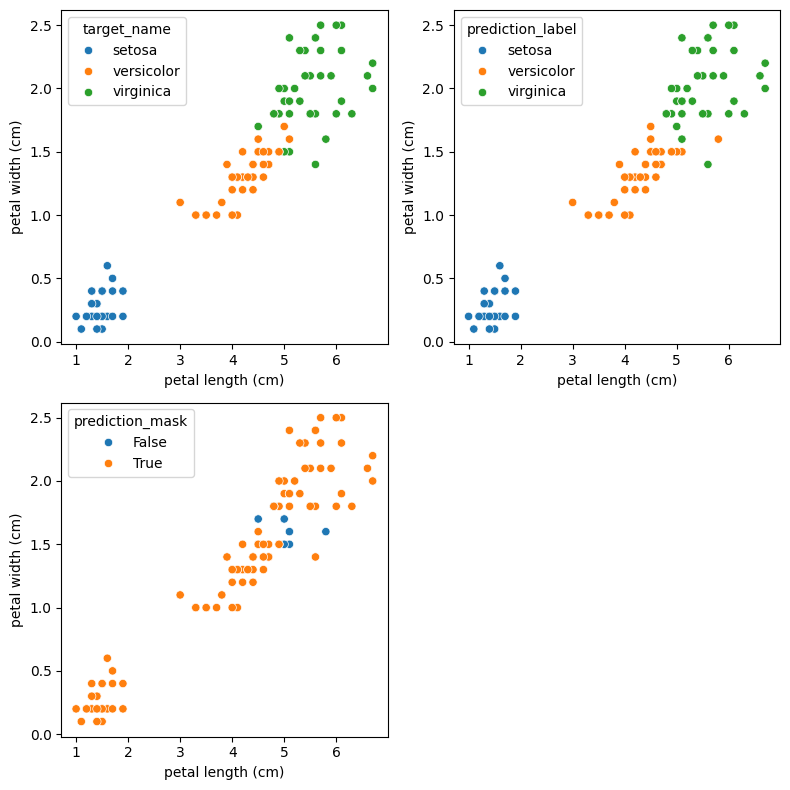

In [137]:
Missing_point_plot(df_train)

From the visualization it seems that the three incorrect prediction points are in actuality very difficult to be predicted and seems doubtful lying in sort of same cluster and model did good job classifying others.

# Fine tuning the model 

In [138]:
# In this stage the parameters of model is tweeked to get the best result and only accuracy is given care

param = {
    'max_depth' : np.arange(2, 10, 1),
    'min_samples_split' : np.arange(2, 20, 1)
}

gridSearch = GridSearchCV(model, param, cv = 10, n_jobs=-1, verbose=1)

gridSearch.fit(x_train, y_train)

print(f"Best Estimator : {gridSearch.best_estimator_}")
print(f"Best Score : {gridSearch.best_score_}")

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Estimator : DecisionTreeClassifier(max_depth=np.int64(3), min_samples_split=np.int64(2),
                       random_state=42)
Best Score : 0.9333333333333332


So the most okish C parameter value is 1 which was the initial value so the model trained initally was somehow the best one. So we can create the final model

In [139]:
final_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
final_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

# Model Testing 

Now the final model is created we can make predicted the test dataset. Also we calculate the accuracy, find confusion matrix and finally visualize the missed prediction as earlier

In [140]:
y_cross_pred_accuracy_test = cross_val_score(model, x_test, y_test, scoring="accuracy")
accuracy = np.mean(y_cross_pred_accuracy_test)
print(f"Accuracy : {accuracy * 100:.2f}%")

Accuracy : 90.00%


The lesser accuracy is expected. Also the dataset itself is small so even few error can contribute to greater drop in accuracy

In [141]:
y_pred_test = cross_val_predict(model, x_test, y_test)
y_pred_test == y_test

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [142]:
confusion_matrix(y_test, y_pred_test)
# to evaluate the  incorrect prediction

array([[ 9,  1,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [143]:
prediction_sucess = y_pred_test == y_test
df_test["prediction"]= y_pred_test
df_test["prediction_label"] = df_test["prediction"].map({0: "setosa", 1: "versicolor", 2 : "virginica"})
df_test["prediction_mask"] = prediction_sucess


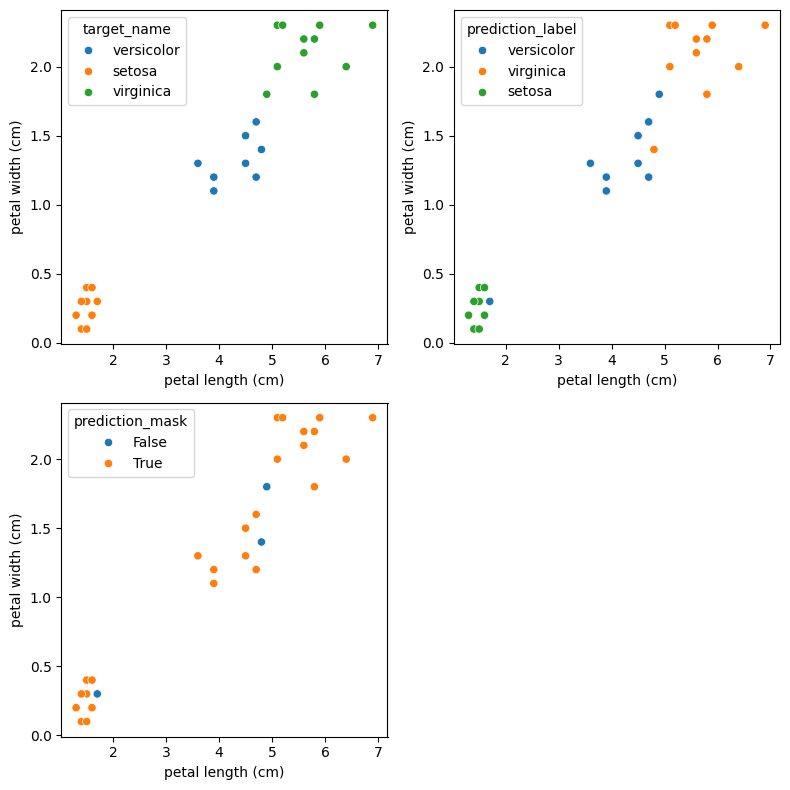

In [144]:
Missing_point_plot(df_test)

Here also the mistake made is sparable as the dta are sort of in the line of confusion. so the model is well trained and worked fine in the test 

In [145]:
# Testing for random dataset
new_samples = pd.DataFrame({
    'sepal length (cm)': [5.8, 5.9, 6.0],
    'sepal width (cm)': [2.7, 3.0, 2.5],
    'petal length (cm)': [4.0, 5.0, 6.8],  # More overlap between Versicolor and Virginica
    'petal width (cm)': [1.2, 1.5, 1.9]

})
new_test = np.array(new_samples)
new_test

array([[5.8, 2.7, 4. , 1.2],
       [5.9, 3. , 5. , 1.5],
       [6. , 2.5, 6.8, 1.9]])

In [146]:
def Test(data):
    prediction = final_model.predict(data)
    print(prediction)

Test(new_test)

[1 1 2]


The result for the random data is also as expected.